In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data import

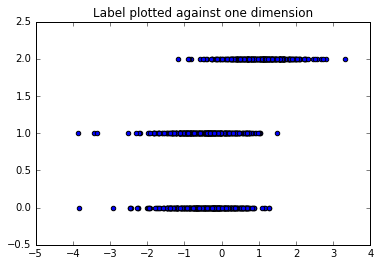

In [56]:
# Import training data
tr_data = genfromtxt('train.csv', delimiter=',')
tr_data = numpy.delete(tr_data,(0), axis=0) #delete header
tr_data = numpy.delete(tr_data,(0), axis=1) #delete Id
y_tr = tr_data[:,0] #get y
x_tr = numpy.delete(tr_data,(0), axis=1) #delete y and get x

# Import test data
tst_data = genfromtxt('test.csv', delimiter=',')
tst_data = numpy.delete(tst_data,(0), axis=0) #delete header
nindex = tst_data[:,0] #nindex is an index array
x_tst = numpy.delete(tst_data,(0), axis=1)

# Scale training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_tr)  # Don't cheat - fit only on training data
x_tr_scaled = scaler.transform(x_tr)
x_tst_scaled = scaler.transform(x_tst)  # apply same transformation to test data

#for i in range(len(x_tr[0,:])):
scatter(x_tr_scaled[:,2],y_tr)
title("Label plotted against one dimension")

# Classify: Run 1

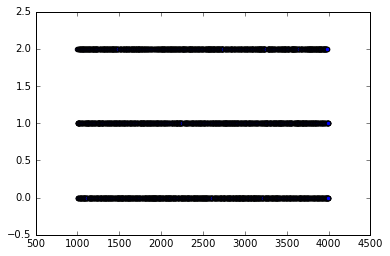

In [145]:
# Classify with Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", n_iter=5000)
clf.fit(x_tr_scaled, y_tr)
"""SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)"""

# Predict and plot my results on test data
y_tst=clf.predict(x_tst_scaled)
scatter(nindex,y_tst)

# Classify: Run2

Change: 0.3 % of the labels changed


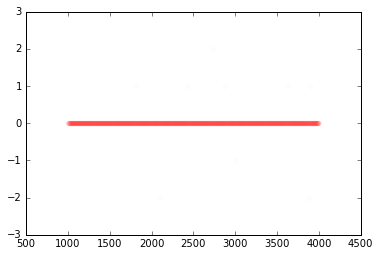

In [151]:
# Do it again with different parameters and plot the difference in previous result and this result.
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2",n_iter=5000)
clf.fit(x_tr_scaled, y_tr)

count=0 # count counts the number of labels that changed between the two runs!
y_tst_2=clf.predict(x_tst_scaled)
#scatter(nindex,y_tst_2,alpha=0.01, color='blue')
#scatter(nindex,y_tst,alpha=0.01, color='red')
y_tst_diff=y_tst_2-y_tst
scatter(nindex,y_tst_diff,alpha=0.01, color='red')
mylength=len(y_tst_diff)
for i in myrange:
    if y_tst_diff[i]!=0:
        count+=1
print("Change:",count/mylength*100,"% of the labels changed")

# Export result

In [152]:
index = []
for i in arange(y_tst.size):
    index.append(int(nindex[i]))

y_tst_int = []
for i in arange(y_tst.size):
    y_tst_int.append(int(y_tst[i]))
import csv
with open('result3.csv', 'w') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(('Id','y'))
    a.writerows(zip(index,y_tst_int))